# **About Dataset**

This is a small subset of dataset of headphone reviews from Amazon. The dataset has 6 columns🎧🎧🎧🎧

1. `Customer Name` -- name of customer who buy the product

2. `REVIEW_TITLE` -- review in short

3. `Color` -- color of the product

4. `REVIEW_DATE` -- date when customer gives rating for eg: 05-Sep-21

4. `COMMENTS` -- customers comment what are feeling of customer about product

5. `RATINGS` -- how customer rate out of 5 star for eg: 4/5

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 7)

headphone_reviews = pd.read_csv('headphone_data.csv')
print(headphone_reviews.head(2))

  Customer_Name                        REVIEW_TITLE  Color REVIEW_DATE  \
0       Ramdika       Really Exceed my expectation.  Black   30-May-21   
1     Sachin AK  Great for a change from inear buds  Black   01-Jun-21   

                                            COMMENTS  RATINGS  
0  Okay.. I was skeptical at first to buy this as...        5  
1  The earphone is worth what you pay for. The de...        5  


## Acknowledgements

This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/mdwaquarazam/headphone-dataset-review-analysis) and from [Amazon product data](https://www.amazon.in/boat-headphones/s?k=boat+headphones)

# **Data to Use**

Since this is a sentiment analysis, we'll concentrate on the columns `REVIEW_TITLE`, `COMMENTS` and `RATINGS`. Additionally, I'll use the assumption that:

- For ratings 4 and 5, the rating will be used as `positive` which we'll be coded as `1`. 

- For rating equal to 3, the rating will be a `neutral` hence coded as `0`.

- Finally for ratings 2 and 1, the rating will be `negative`, thus coded `2`. 

In [2]:
headphone_reviews = headphone_reviews[['REVIEW_TITLE', 'COMMENTS', 'RATINGS']].dropna()
headphone_reviews['RATINGS'] = [1 if rate >=4 else 0 if rate == 3 else 2 
                                for rate in headphone_reviews.RATINGS]
print(headphone_reviews.shape)
print(headphone_reviews.head(3))

(1538, 3)
                         REVIEW_TITLE  \
0       Really Exceed my expectation.   
1  Great for a change from inear buds   
2      For people with sensitive ears   

                                            COMMENTS  RATINGS  
0  Okay.. I was skeptical at first to buy this as...        1  
1  The earphone is worth what you pay for. The de...        1  
2  Particularly for people with sensitive ears, w...        1  


## String Frequency

- First, a wordcloud will be created to see the frequency of words in the in `COMMENTS` column both the training and testing data. From the plots it is evident that the common words used in the comments are similar in both the training and test set.

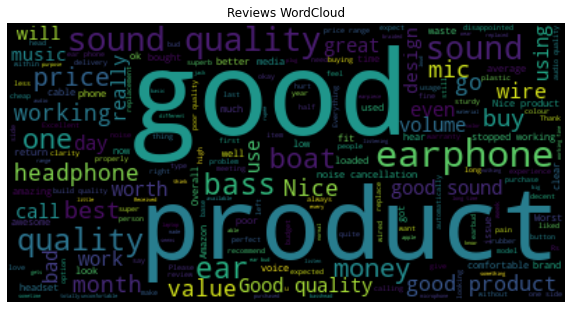

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = ' '.join(headphone_reviews.COMMENTS)

# Setting wordcloud to plot
cloud_reviews = WordCloud(height=200).generate(all_reviews)

# Plotting the wordcloud
plt.subplots(figsize=(10, 6))
plt.imshow(cloud_reviews, interpolation='bilinear')
plt.axis('off');
plt.title('Reviews WordCloud');

# **Provisional Model Building**

For this section, we'll create a logistic regression model without any adjustments to the data and see how our model performs.

## Creating a Vectorized DataFrame

In this section we'll use the TF-IDF Vectorizer because it penalizes most frequent words and gives weight to less frequent word in the corpus.

- For now, we'll use the the functionality with its default values. Only the `COMMENTS` column has been used.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

review_vectorizer = TfidfVectorizer().fit(headphone_reviews.COMMENTS)
comments_data = review_vectorizer.transform(headphone_reviews.COMMENTS).toarray()
review_df = pd.DataFrame(comments_data, columns=review_vectorizer.get_feature_names_out())
review_df

,00,10,100,...,yup,zero,zoom
0,0.0,0.0,0.000000,...,0.0,0.0,0.0
1,0.0,0.0,0.000000,...,0.0,0.0,0.0
2,0.0,0.0,0.000000,...,0.0,0.0,0.0
3,0.0,0.0,0.052903,...,0.0,0.0,0.0
4,0.0,0.0,0.000000,...,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1533,0.0,0.0,0.000000,...,0.0,0.0,0.0
1534,0.0,0.0,0.000000,...,0.0,0.0,0.0
1535,0.0,0.0,0.000000,...,0.0,0.0,0.0
1536,0.0,0.0,0.000000,...,0.0,0.0,0.0


## Training and Testing Data

Eighty percent of the data will be used to train the model. The use of `train_test_split()` was settled upon despite the dataset having labels that call for a multi-class classification solution because the split data have reasonable values. 

- Note that the features data `X` will be the vectorized `review_df` while the labels data will be extracted from the `RATINGS` column from the `headphone_reviews` dataset. 

In [5]:
from sklearn.model_selection import train_test_split

X = review_df
y = headphone_reviews.RATINGS

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, train_size=0.8, 
                     stratify=y, random_state=42)

pd.DataFrame({'training_data': y_train.value_counts(), 
              'testing_data': y_test.value_counts()})

,training_data,testing_data
1,706,177
2,406,101
0,118,30


## Building a Classifier

Here, a logistic regression model is trained to predict sentiment. In other words, the model a logistic regression model is trained and then its performance checked on test data to see how well the model performs.

- The default values of the Logistic Regression functionality are used. 

In [6]:
from sklearn.linear_model import LogisticRegression

prov_regressor = LogisticRegression().fit(X_train, y_train)
y_predicted = prov_regressor.predict(X_test)
print(set(y_predicted))
print(y_predicted[:10])

{1, 2}
[2 2 2 1 2 1 2 2 1 2]


## Accuracy of the Model

- Here we use `accuracy_score` and the `confusion_matrix` to check how the logistic regression model performed. An accuracy of 0.81 is good but our model did not even predict a `negative` score.  

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_predicted))
print('-'*40)
print(confusion_matrix(y_test, y_predicted) / len(y_test))

0.8084415584415584
----------------------------------------
[[0.         0.06818182 0.02922078]
 [0.         0.5487013  0.02597403]
 [0.         0.06818182 0.25974026]]


## Other Metrics

- In addition to confusion matrix, let's check the precision, recall and the f1-score

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.80      0.95      0.87       177
           2       0.82      0.79      0.81       101

    accuracy                           0.81       308
   macro avg       0.54      0.58      0.56       308
weighted avg       0.73      0.81      0.77       308



# **Lemmatized Model**

## Lemmatizing the Comments

After building a model with the default functionalities and composition, now its time to see the effect of lemmatization in our model.

- Apart from punctuations, for now stop words will be ignored.

In [9]:
import spacy
nlp = spacy.load('en_core_web_lg')
my_stopwords = {'.', '..', ',', '!', ':', '...', '?'}
headphone_reviews['COMMENTS'] = headphone_reviews.COMMENTS.str.lower()
headphone_reviews['lemmatized_comments'] =\
    headphone_reviews\
        .COMMENTS\
        .apply(lambda row: ' '.join([tag.lemma_ for tag in nlp(row) if not tag.lemma_ in my_stopwords][:-1]))

X = headphone_reviews.lemmatized_comments
y = headphone_reviews.RATINGS

X_train, X_test, y_train, y_test =\
        train_test_split(X, y, train_size=0.85, 
                         random_state=42, stratify=y)

## Vectorizing the Comments

- We'll still use TF-IDF vectorizer with the default settings to vectorize the comments.

In [10]:
lemma_vectorizer = TfidfVectorizer()
train_matrix = lemma_vectorizer.fit_transform(X_train)
test_matrix = lemma_vectorizer.transform(X_test)

columns = lemma_vectorizer.get_feature_names_out()
train_data = train_matrix.toarray()

## Creating a Classifier

Now we can train our model using `LogisticRegression` classifier. There is a slight improvement of a 0.01 difference.

In [11]:
clf = LogisticRegression()
clf.fit(train_data, y_train)

y_predicted = clf.predict(test_matrix.toarray())
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
set(y_predicted)

0.8138528138528138


{0, 1, 2}

- Let's check the classification report

In [22]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.55      0.32      0.41        34
           1       0.79      0.92      0.85       159
           2       0.77      0.53      0.62        38

    accuracy                           0.77       231
   macro avg       0.70      0.59      0.63       231
weighted avg       0.75      0.77      0.75       231



- However, there is a prediction issue with the neutral value. As evident below, the comment was retrieved from a so called neutral rating yet the predictor classified it as a positive rating.

In [13]:
comment = headphone_reviews[headphone_reviews.RATINGS == 0]['COMMENTS'].loc[12]
prediction = clf.predict(lemma_vectorizer.transform([comment]))[0]
print(comment)
print('-'*50)
print(prediction)

if you are the type of person who does not like to fumble around with bluetooth on windows laptops and already have a good pair of headphones and earphones and need these for taking online classes or meetings or just watching youtube, they are totally alright for that purpose.the build quality is very nice. will survive some abuse. have braided cable. the plastic quality is also excellent no sharp edges.i have compared these to apple's earpods. earpods still sound better than these. don't buy these for music purposes because you'll be heavily disappointed. they sound garbage, but for anything speech related, these are fine. as i said, if you want to take a quick meeting or just for an online class or watch youtube.
--------------------------------------------------
1


# **Adjusting Model and Parameters** 

Now we'll adjust the model and parameters to see how well how our classifier performs.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Vectorization of ratings
lemma_vectorizer = CountVectorizer(max_features=900, ngram_range=(1, 3))
train_matrix = lemma_vectorizer.fit_transform(X_train)
test_matrix = lemma_vectorizer.transform(X_test)

columns = lemma_vectorizer.get_feature_names_out()
train_data = train_matrix.toarray()

# Classification of ratings
clf = MultinomialNB()
clf.fit(train_data, y_train)

test_data = test_matrix.toarray()
y_predicted = clf.predict(test_data)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
set(y_predicted)

0.8008658008658008


{0, 1, 2}

- Let's check the classification report

In [15]:
print(classification_report(y_test, y_predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.29      0.09      0.14        22
           1       0.83      0.94      0.88       133
           2       0.78      0.76      0.77        76

    accuracy                           0.80       231
   macro avg       0.63      0.60      0.60       231
weighted avg       0.76      0.80      0.78       231



- Here, despite the model scoring lower compared to the previous model, comment is predicted as a neutral comment similar to what was recorded in the data.

In [16]:
prediction = clf.predict(lemma_vectorizer.transform([comment]))[0]
print(prediction)

0


# **Predicting Ratings Polarity**

Previously, assumption was made that depending on the ratings, the polarity of the `RATINGS` column was either negative, positive or neutral. 

- For this section, we'll use the `textblob` library to predict polarity. From the result it is evident that there were discrepancy in ratings for over 500 comments.  

In [17]:
from textblob import TextBlob

polarity_function = lambda row: TextBlob(row).sentiment.polarity
headphone_reviews['polarity_score'] = headphone_reviews.COMMENTS.apply(polarity_function)
headphone_reviews['polarity_rating'] = [1 if row > 0 else 0 if row == 0 else 2 
                                        for row in headphone_reviews.polarity_score]
headphone_reviews[headphone_reviews.RATINGS != headphone_reviews.polarity_rating].shape

(528, 6)

- Since there is a new method of classifying the ratings, new training and testing data are created to match the change.

In [18]:
y = headphone_reviews.polarity_rating
X = headphone_reviews.lemmatized_comments

X_train, X_test, y_train, y_test =\
        train_test_split(X, y, train_size=0.85, 
                         random_state=42, stratify=y)

- Performing the classification, it is evident that the model performs poorly but still there is evidence that all the rating categories are predicted.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Vectorization of ratings
lemma_vectorizer = CountVectorizer(max_features = 900, ngram_range=(1, 3))
train_matrix = lemma_vectorizer.fit_transform(X_train)
test_matrix = lemma_vectorizer.transform(X_test)

columns = lemma_vectorizer.get_feature_names_out()
train_data = train_matrix.toarray()

# Classification of ratings
clf = MultinomialNB()
clf.fit(train_data, y_train)

test_data = test_matrix.toarray()
y_predicted = clf.predict(test_data)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
set(y_predicted)

0.7705627705627706


{0, 1, 2}

- Let's check the classification report

In [20]:
classification_report(y_test, y_predicted, output_dict=False)

              precision    recall  f1-score   support

           0       0.55      0.32      0.41        34
           1       0.79      0.92      0.85       159
           2       0.77      0.53      0.62        38

    accuracy                           0.77       231
   macro avg       0.70      0.59      0.63       231
weighted avg       0.75      0.77      0.75       231



- When we test our classifier on a negative comment the classifier predicts it right.

In [21]:
comment = "I w'ont recommend due to poor quality"
prediction = clf.predict(lemma_vectorizer.transform([comment]))[0]
print(prediction)

2
